# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [3]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [4]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [5]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [6]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [7]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [8]:
# Load JSON file data into DataFrame
json_df = pd.read_json('data/world_bank_projects.json')
json_df[['countryname','project_name']].head()

,countryname,project_name
0,Federal Democratic Republic of Ethiopia,Ethiopia General Education Quality Improvement...
1,Republic of Tunisia,TN: DTF Social Protection Reforms Support
2,Tuvalu,Tuvalu Aviation Investment Project - Additiona...
3,Republic of Yemen,Gov't and Civil Society Organization Partnership
4,Kingdom of Lesotho,Second Private Sector Competitiveness and Econ...


#1 Top 10 countries with most projects

In [9]:
#Group by countryname to get the total count of projects for each country and after sorting fetch top 10 values
result1 = json_df[['countryname','project_name']].groupby(['countryname']).size().sort_values(ascending=False).head(10)
result1

countryname
People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Nepal                              12
People's Republic of Bangladesh    12
Kingdom of Morocco                 12
Africa                             11
Republic of Mozambique             11
dtype: int64

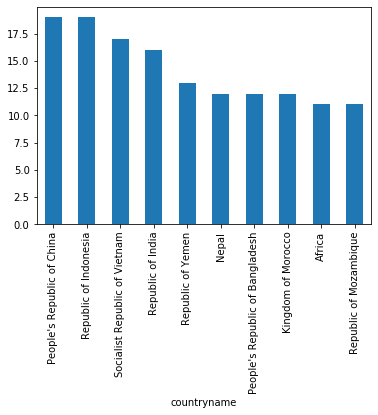

In [10]:
result1.plot(kind='Bar')

#2 Top 10 major project themes i.e. 'mjtheme_namecode'

In [13]:
# Load JSON as string
json_string = json.load((open('data/world_bank_projects.json')))

In [12]:
# Create dataFrame from JSON
json_normalized = json_normalize(json_string,'mjtheme_namecode',['countryname','project_name'])
json_normalized.head(10)

,code,name,countryname,project_name
0,8,Human development,Federal Democratic Republic of Ethiopia,Ethiopia General Education Quality Improvement...
1,11,,Federal Democratic Republic of Ethiopia,Ethiopia General Education Quality Improvement...
2,1,Economic management,Republic of Tunisia,TN: DTF Social Protection Reforms Support
3,6,Social protection and risk management,Republic of Tunisia,TN: DTF Social Protection Reforms Support
4,5,Trade and integration,Tuvalu,Tuvalu Aviation Investment Project - Additiona...
5,2,Public sector governance,Tuvalu,Tuvalu Aviation Investment Project - Additiona...
6,11,Environment and natural resources management,Tuvalu,Tuvalu Aviation Investment Project - Additiona...
7,6,Social protection and risk management,Tuvalu,Tuvalu Aviation Investment Project - Additiona...
8,7,Social dev/gender/inclusion,Republic of Yemen,Gov't and Civil Society Organization Partnership
9,7,Social dev/gender/inclusion,Republic of Yemen,Gov't and Civil Society Organization Partnership


In [41]:
#Group by code(since name has few empty values, hence not included in group by 
#because those will then get excluded from count) 
#to get the total count of project themes and after sorting fetch top 10 values

result2 = json_normalized.groupby(['code']).size().sort_values(ascending = False)
result2

code
11    250
10    216
8     210
2     199
6     168
4     146
7     130
5      77
9      50
1      38
3      15
dtype: int64

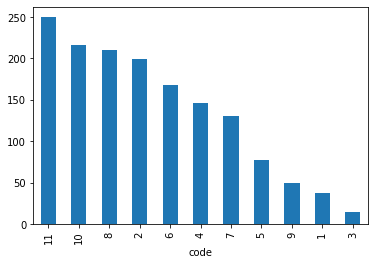

In [31]:
result2.plot(kind='Bar')

#3 Above you will notice that some entries have only the code and the name is missing. 
   Create a dataframe with the missing names filled in.

In [15]:
%%time
#To get NaN and assign it to empty string values
import numpy as np

#Get columns apart from name column as it has empty string
df1 = json_normalized[['code','countryname','project_name']].reset_index()

#Assign NaN to empty string values and remove those rows
df2 = json_normalized.replace('',np.NaN)[['code','name']].drop_duplicates().dropna()

#Merge both dataframes to get final dataframe with required values
result_df = pd.merge(df1,df2,on='code').sort_values('index').reset_index()
result_df[['code','name','countryname','project_name']]

CPU times: user 19.5 ms, sys: 2.54 ms, total: 22.1 ms
Wall time: 21.8 ms


,code,name,countryname,project_name
0,8,Human development,Federal Democratic Republic of Ethiopia,Ethiopia General Education Quality Improvement...
1,11,Environment and natural resources management,Federal Democratic Republic of Ethiopia,Ethiopia General Education Quality Improvement...
2,1,Economic management,Republic of Tunisia,TN: DTF Social Protection Reforms Support
3,6,Social protection and risk management,Republic of Tunisia,TN: DTF Social Protection Reforms Support
4,5,Trade and integration,Tuvalu,Tuvalu Aviation Investment Project - Additiona...
5,2,Public sector governance,Tuvalu,Tuvalu Aviation Investment Project - Additiona...
6,11,Environment and natural resources management,Tuvalu,Tuvalu Aviation Investment Project - Additiona...
7,6,Social protection and risk management,Tuvalu,Tuvalu Aviation Investment Project - Additiona...
8,7,Social dev/gender/inclusion,Republic of Yemen,Gov't and Civil Society Organization Partnership
9,7,Social dev/gender/inclusion,Republic of Yemen,Gov't and Civil Society Organization Partnership
